In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
RANDOM_STATE = 112

In [3]:
import sklearn.datasets
digits_dataset = sklearn.datasets.load_digits()
digits = pd.DataFrame(digits_dataset.data)
labels = pd.Series(digits_dataset.target, index=digits.index)

THRESHOLD = np.mean(digits.values.reshape(-1))
binary_digits = digits >= THRESHOLD

from sklearn.utils import shuffle
binary_digits = shuffle(binary_digits, random_state=RANDOM_STATE)
labels = labels.loc[binary_digits.index]

In [4]:
K=len(labels.unique())
D=len(binary_digits.columns)

In [5]:
def draw_digit(row, vmin=0, vmax=1, square=True, **kwargs):
    return sns.heatmap(row.astype(float).reshape(8, 8), square=square, vmin=vmin, vmax=vmax, **kwargs)

/Users/saulius/.virtualenvs/scientific-py3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


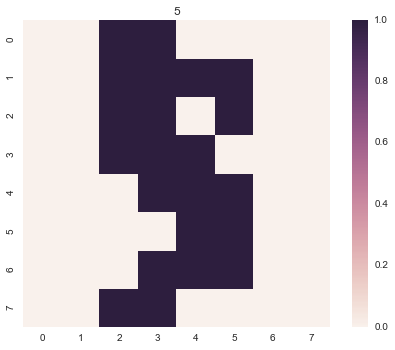

In [6]:
draw_digit(binary_digits.iloc[0])
plt.title(labels.iloc[0])

In [7]:
up_missing = binary_digits.iloc[:len(binary_digits)//4].copy()
bottom_missing = binary_digits.iloc[len(binary_digits)//4:len(binary_digits)//2].copy()
even_missing = binary_digits.iloc[len(binary_digits)//2:].copy()
up_missing.iloc[:, :D//2] = None
bottom_missing.iloc[:, D//2:] = None
even_missing.iloc[:, np.arange(0, D, 2)] = None

up_missing['dataset_id'] = 'up_missing'
bottom_missing['dataset_id'] = 'bottom_missing'
even_missing['dataset_id'] = 'even_missing'

training_data = pd.concat((up_missing, bottom_missing, even_missing))

In [8]:
training_data['weight'] = 1

In [9]:
from bernoullimix import MultiDatasetMixtureModel
training_data = MultiDatasetMixtureModel.collapse_dataset(training_data)

In [10]:
from bernoullimix.random_initialisation import random_mixture_generator

In [11]:
N_MIXTURES_TO_TRAIN = 10

In [12]:
import itertools
mixtures = list(itertools.islice(random_mixture_generator(10, training_data, random_state=RANDOM_STATE), N_MIXTURES_TO_TRAIN))

/Users/saulius/dev/bernoulli-mixture-model/bernoullimix/random_initialisation.py:140: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  data = dataset[dataset.columns - [DATASET_ID_COLUMN, WEIGHT_COLUMN]]


In [13]:
%%time
fit_results = []

for i, mixture in enumerate(mixtures):
    print('Fitting #{}'.format(i))
    
    result = mixture.fit(training_data, eps=1e-4, verbose=False, n_iter=None)
    print(result)
    fit_results.append(result)  
    

Fitting #0
(True, 285, -21138.140600895727)
Fitting #1
(True, 261, -20789.750647965186)
Fitting #2
(True, 287, -20947.418228684903)
Fitting #3
(True, 428, -20840.313250334344)
Fitting #4
(True, 257, -21045.816923257546)
Fitting #5
(True, 244, -20967.702848688812)
Fitting #6
(True, 218, -21398.236027652074)
Fitting #7
(True, 306, -20981.363369147588)
Fitting #8
(True, 467, -20771.519964851715)
Fitting #9
(True, 1305, -20891.991061230008)
CPU times: user 41min 8s, sys: 9.52 s, total: 41min 17s
Wall time: 41min 19s
